In [90]:
#imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D


In [91]:
df_raw = pd.read_excel('D:\\OneDrive\\Boston University\\OneDrive - Boston University\\Desktop\\Test_var2.xlsx')
df_raw.head()

,Time,s002_A01,s003_A02,s005_A04,s007_A06,s008_A07,s009_A08,s011_A10,s012_A11,s013_A12,...,s087_H11,s088_H10,s089_H09,s091_H07,s092_H06,s093_H05,s094_H04,s095_H03,s096_H02,s097_H01
0,0.0,51503.367330,87613.081483,77202.277751,30345.844535,69648.971410,46024.161512,55312.032905,74547.758600,48932.106248,...,34828.819425,32805.626500,57674.210325,50475.197277,38266.050257,61479.872252,53214.299513,40383.353133,23226.202256,31682.354957
1,0.5,48202.555311,85029.312152,71947.917525,31014.152619,68295.684115,44950.981932,54552.977453,67542.881732,49255.259421,...,35889.883627,33698.141339,63871.905739,52970.867122,45731.114850,69127.081647,55052.515179,47021.164585,28886.646705,35325.820292
2,1.0,47049.761434,82825.623234,68792.015600,31977.868902,68175.035952,44984.534781,53828.611239,63888.523671,49905.871828,...,37347.196721,34497.565313,68752.762712,55130.673826,51031.534248,74719.263243,55712.598939,53062.793005,34828.556298,38898.151798
3,1.5,47751.168097,81078.151894,68442.071940,33199.434944,69458.805089,46158.238043,53181.914826,63631.412504,50930.770454,...,39060.372094,35202.536991,72183.986115,56968.177978,53932.614584,78150.388598,55666.397708,57671.790778,39926.703210,42177.597579
4,2.0,49466.275888,79816.003477,69970.735926,34574.547674,71988.002927,48246.245851,52640.761660,65352.038240,52367.309828,...,40827.445956,35818.789473,74390.615824,58568.915582,54761.483156,80053.231313,55417.411283,60525.522069,43400.455281,45027.002546


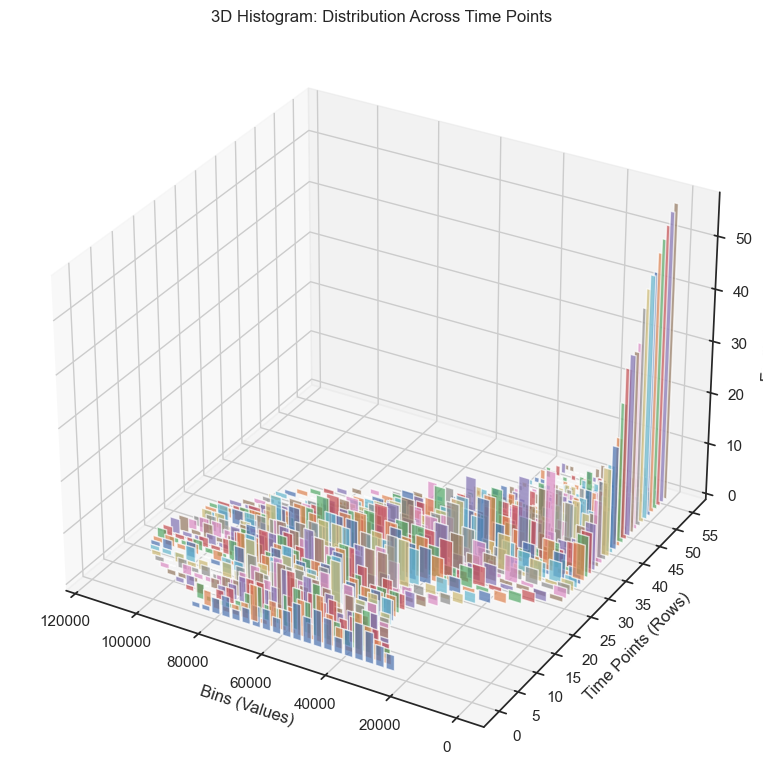

In [92]:

# Get numerical data only
data = df_raw.drop('Time', axis=1)

# Create figure and 3D axis
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Set parameters for histograms
n_bins = 20
n_timepoints = len(data)

# Create 3D histogram
for i, (idx, row) in enumerate(data.iterrows()):
    # Calculate histogram for current time point
    values = row.dropna().values  # Remove NaN values
    if len(values) > 0:
        hist, bin_edges = np.histogram(values, bins=n_bins)
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

        # Create 3D bars with swapped axes
        ax.bar(bin_centers, hist, zs=i, zdir='y', alpha=0.7, width=(bin_edges[1]-bin_edges[0])*0.8)

# Set labels and title with swapped axes
ax.set_xlabel('Bins (Values)')
ax.set_ylabel('Time Points (Rows)')
ax.set_zlabel('Frequency')
ax.set_title('3D Histogram: Distribution Across Time Points')

# Set time point labels on y-axis
ax.set_yticks(range(0, n_timepoints, max(1, n_timepoints//10)))
# Flip the x-axis direction
ax.invert_xaxis()

plt.tight_layout()
plt.show()

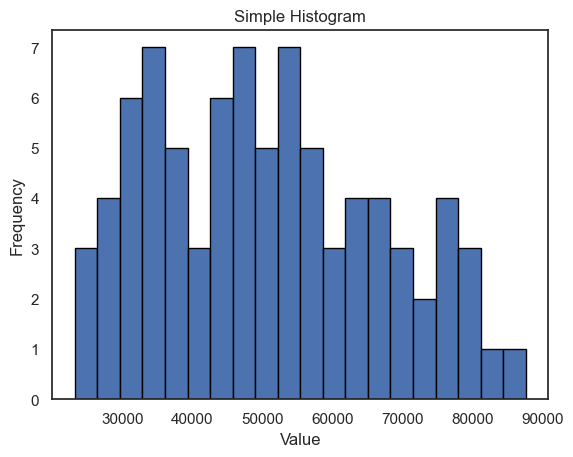

In [93]:
import matplotlib.pyplot as plt

data = df_raw.drop('Time', axis=1).iloc[0].dropna().values
plt.hist(data, bins=20, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Simple Histogram')
plt.show()


Generating Joy Plot...


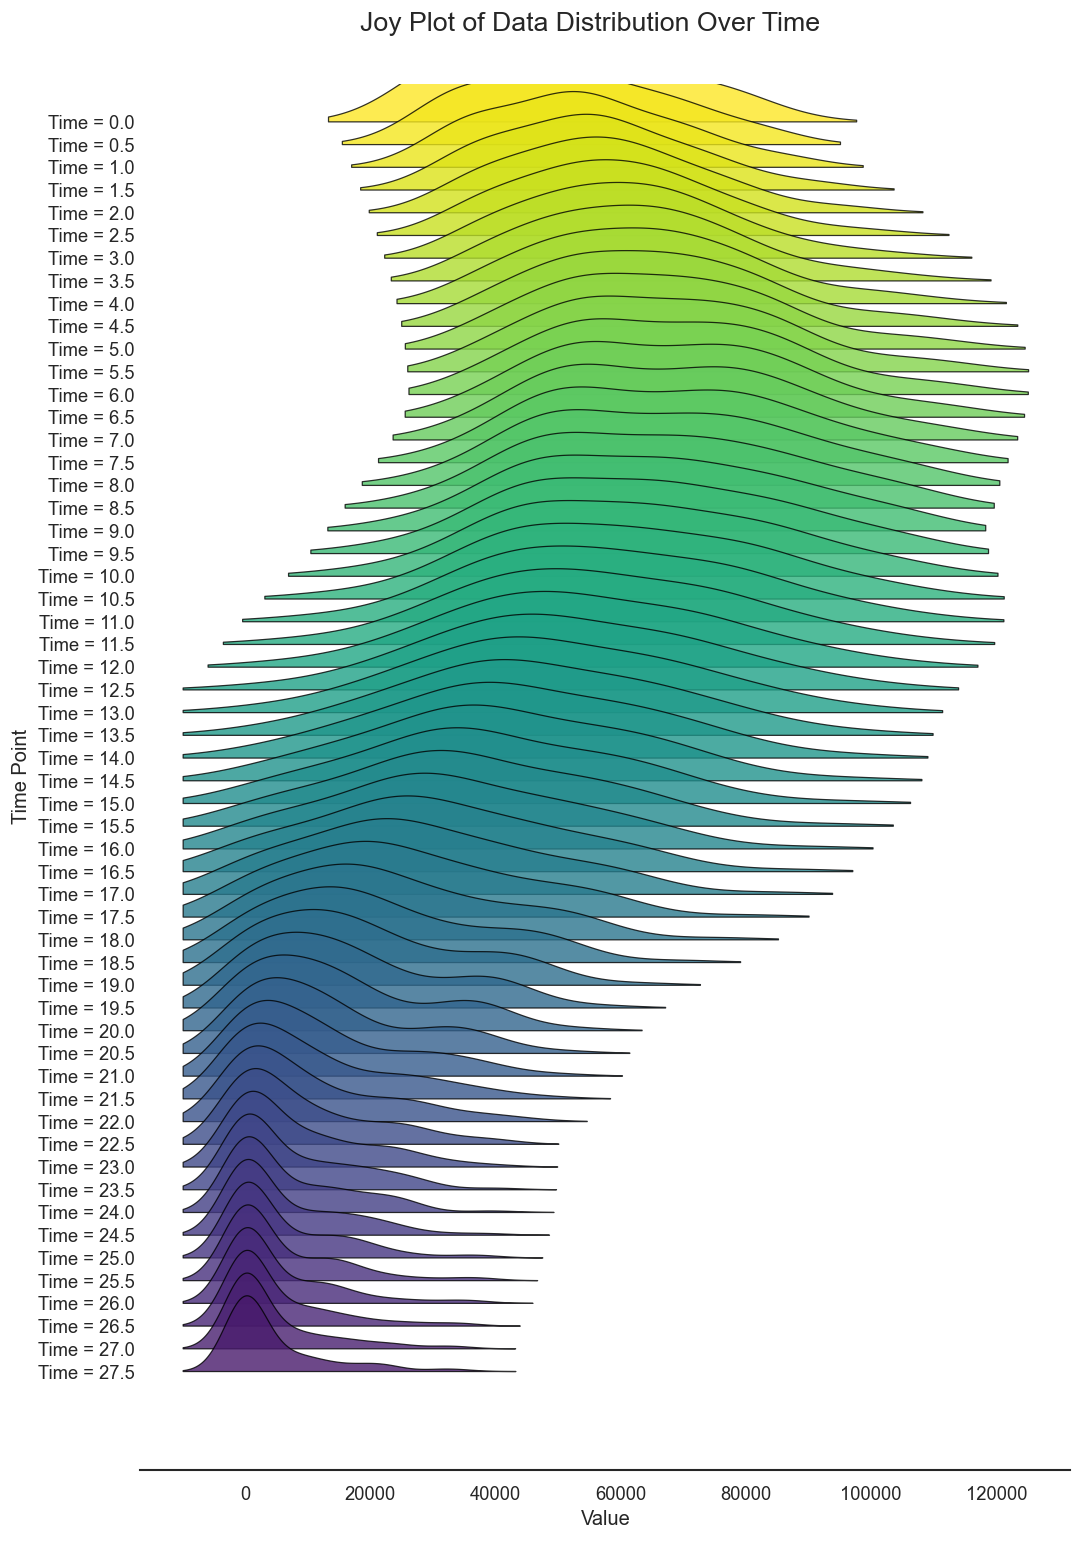

Plot generation complete.


In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

def create_joy_plot(file_path):
    """
    Reads data from a CSV file and creates a joy plot (ridgeline plot) on a single axis.

    Each line in the plot represents the distribution of data at a specific time point.
    This uses a Kernel Density Estimate (KDE) for a smooth representation of the distribution.

    Args:
        file_path (str): The path to the input CSV file.
    """
    try:
        # Load the dataset from the provided CSV file
        df = pd.read_excel(file_path)
    except FileNotFoundError:
        print(f"Error: The file '{file_path}' was not found.")
        return

    # --- 1. Prepare Data ---
    # Extract the 'Time' column for the y-axis labels
    time_points = df['Time'].values
    # Get the rest of the data for the distributions
    data_values = df.drop(columns='Time')

    # --- 2. Set up the Plot ---
    print("Generating Joy Plot...")
    fig, ax = plt.subplots(figsize=(10, 15), dpi=120)

    # Define the vertical overlap between plots and a color palette
    overlap = 0.7
    # Using a reversed colormap so earlier times (plotted first) get the "start" color
    pal = plt.get_cmap('viridis_r', len(data_values) + 4)

    # --- 3. Iterate Through Time Points and Plot ---
    # We iterate through each row of the dataframe (each time point)
    for i, (index, row) in enumerate(data_values.iterrows()):
        # Calculate the vertical position for the current plot
        y_pos = i * (1 - overlap)

        # Get data for the current time point and drop any missing values
        subset = row.dropna()

        # A Kernel Density Estimate requires at least 2 data points.
        if len(subset) < 2:
            print(f"Skipping Time={time_points[index]} due to insufficient data.")
            continue

        try:
            # --- 4. Calculate Kernel Density Estimate (KDE) ---
            # 'silverman' is a standard method for automatically estimating the bandwidth
            kde = gaussian_kde(subset, bw_method='silverman')
            x_range = np.linspace(subset.min() - 10000, subset.max() + 10000, 500)
            density = kde(x_range)

            # Scale the density curve's height to 1 for consistent appearance
            density_scaled = density / density.max() if density.max() > 0 else density

        except np.linalg.LinAlgError:
            # This can happen if all data points in a row are identical
            print(f"Skipping Time={time_points[index]} due to a linear algebra error (likely identical data points).")
            continue

        # --- 5. Plot the Density Curve ---
        # The zorder ensures that plots for earlier times are drawn on top of later ones
        zorder = i

        # Combine fill and outline in one command
        ax.fill_between(x_range, y_pos, y_pos - density_scaled,
                facecolor=pal(i), edgecolor='black', linewidth=0.75,
                zorder=zorder, alpha=0.8)


    # --- 6. Final Plot Styling ---
    # Set y-axis ticks to correspond to the time points for clear labeling
    y_ticks = [i * (1 - overlap) for i in range(len(time_points))]
    ax.set_yticks(y_ticks)
    ax.set_yticklabels([f'Time = {t}' for t in time_points])

    # Invert the y-axis so that t=0 is at the top
    ax.invert_yaxis()

    # Clean up the axes and grid for a minimalist look
    ax.set_xlabel('Value', fontsize=12)
    ax.set_ylabel('Time Point', fontsize=12)
    ax.spines[['left', 'right', 'top']].set_visible(False)
    ax.grid(False)
    ax.tick_params(axis='y', length=0) # Remove y-axis tick marks

    # Set plot limits to ensure all data is visible
    ax.set_ylim(len(data_values) * (1 - overlap) + 1, -0.5)

    fig.suptitle('Joy Plot of Data Distribution Over Time', fontsize=16, y=0.92)
    #plt.tight_layout(rect=[0, 0.02, 1, 0.9]) # Adjust layout to make space for title and labels

    plt.show()
    print("Plot generation complete.")

    return fig


# --- Main execution ---
if __name__ == '__main__':
    # Ensure this file is in the same directory as the script, or provide the full path.
    file_to_visualize = 'D:\\OneDrive\\Boston University\\OneDrive - Boston University\\Desktop\\Test_var2.xlsx'
    fig1 = create_joy_plot(file_to_visualize)


Loaded data from D:\OneDrive\Boston University\OneDrive - Boston University\Desktop\Data Analysis\Viability2\Raw_var2.xlsx (Sheet: Sheet3)
   Time           A01           A02           A04           A06           A07  \
0   0.0  51503.367330  87613.081483  77202.277751  30345.844535  69648.971410   
1   0.5  48202.555311  85029.312152  71947.917525  31014.152619  68295.684115   
2   1.0  47049.761434  82825.623234  68792.015600  31977.868902  68175.035952   
3   1.5  47751.168097  81078.151894  68442.071940  33199.434944  69458.805089   
4   2.0  49466.275888  79816.003477  69970.735926  34574.547674  71988.002927   

            A08           A10           A11           A12  ...           H02  \
0  46024.161512  55312.032905  74547.758600  48932.106248  ...  23226.202256   
1  44950.981932  54552.977453  67542.881732  49255.259421  ...  28886.646705   
2  44984.534781  53828.611239  63888.523671  49905.871828  ...  34828.556298   
3  46158.238043  53181.914826  63631.412504  50930.770

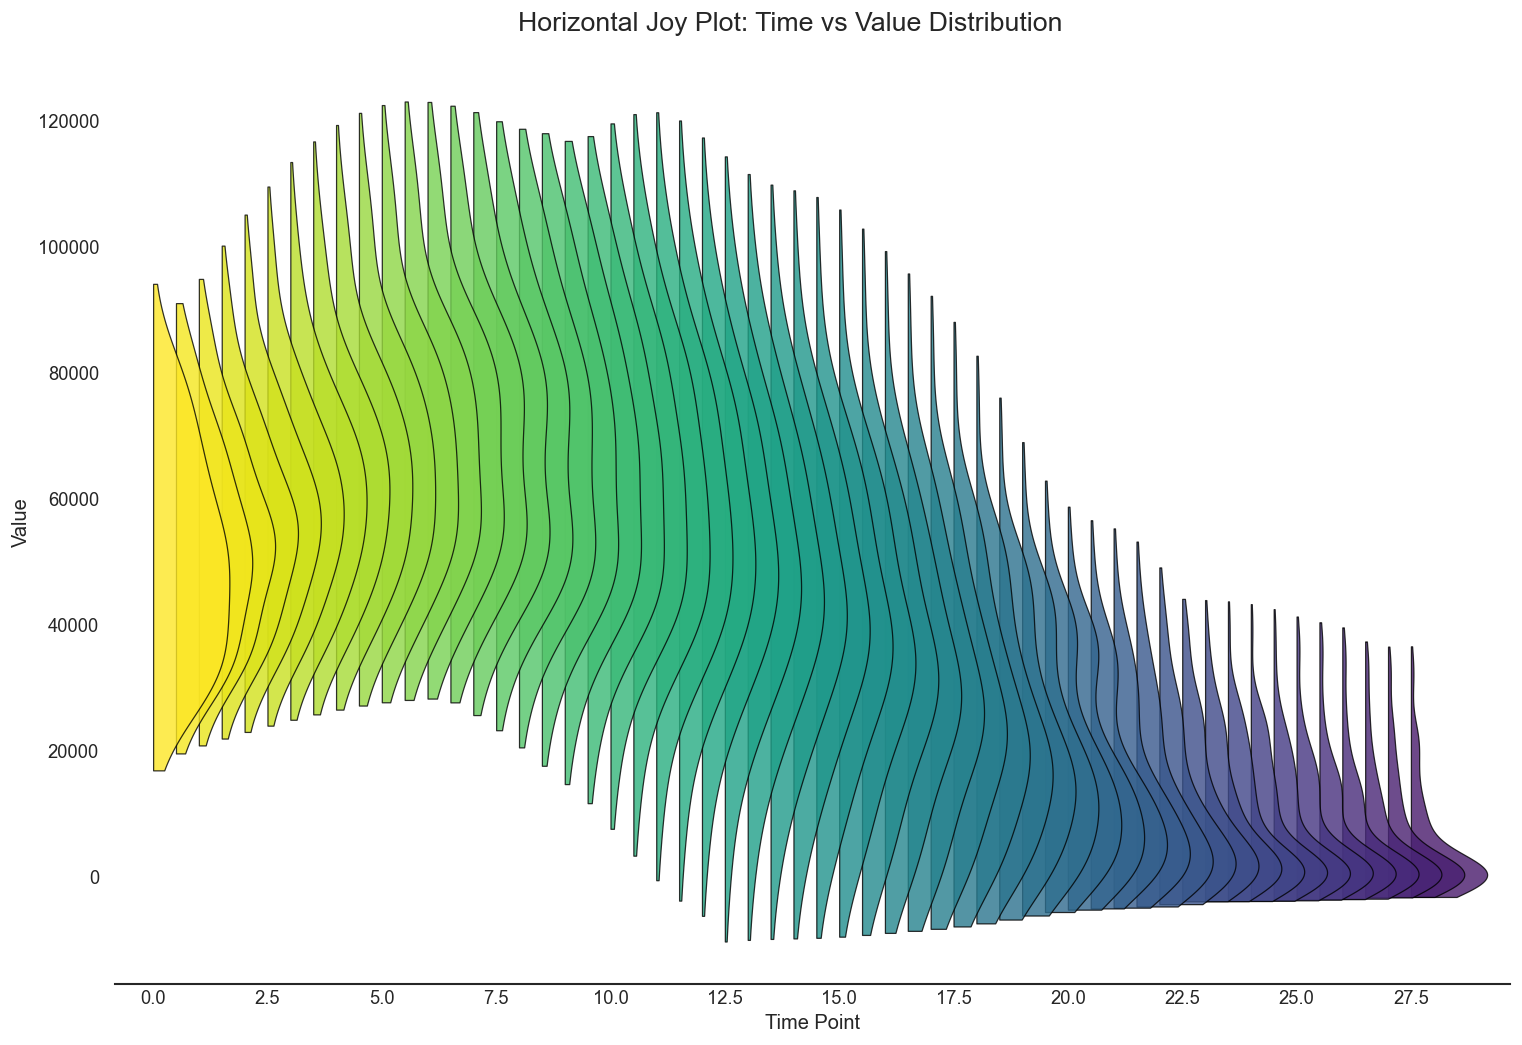

Horizontal plot generation complete.


In [97]:
def create_joy_plot_horizontal(file_path, sheet_name=None):
    """
    Creates a horizontal joy plot with time on x-axis and values on y-axis.
    Density peaks point towards the positive x-axis (right).
    """
    try:
        df = pd.read_excel(file_path, sheet_name=sheet_name)
        print(f"Loaded data from {file_path} (Sheet: {sheet_name})")
        print(df.head())
    except FileNotFoundError:
        print(f"Error: The file '{file_path}' was not found.")
        return

    # Extract time points and data values
    time_points = df['Time'].values
    data_values = df.drop(columns='Time')

    # Set up the plot with swapped dimensions
    print("Generating Horizontal Joy Plot...")
    fig, ax = plt.subplots(figsize=(15, 10), dpi=120)

    # Define horizontal spacing and color palette
    overlap = 0.7
    pal = plt.get_cmap('viridis_r', len(data_values) + 4)

    # Iterate through time points
    for i, (index, row) in enumerate(data_values.iterrows()):
        # Calculate horizontal position for current plot
        x_pos = i * (1 - overlap)

        # Get data and drop missing values
        subset = row.dropna()

        if len(subset) < 2:
            print(f"Skipping Time={time_points[index]} due to insufficient data.")
            continue

        try:
            # Calculate KDE
            kde = gaussian_kde(subset, bw_method='silverman')
            buffer = (subset.max() - subset.min()) * 0.1  # 10% of data range
            y_range = np.linspace(subset.min() - buffer, subset.max() + buffer, 500)
            density = kde(y_range)

            # Scale density
            density_scaled = density / density.max() if density.max() > 0 else density

        except np.linalg.LinAlgError:
            print(f"Skipping Time={time_points[index]} due to linear algebra error.")
            continue

        # Plot horizontal density curve (peaks point right)
        zorder = len(data_values)-i
        ax.fill_betweenx(y_range, x_pos, x_pos + density_scaled,
                        facecolor=pal(i), edgecolor='black', linewidth=0.75,
                        zorder=zorder, alpha=0.8)

    # Set x-axis ticks to correspond to time points
    x_ticks = [i * (1 - overlap) for i in range(len(time_points))]
    ax.set_xticks(x_ticks)
    ax.set_xticklabels([f'{t}' for t in time_points])

    x_ticks = [i * (1 - overlap) for i in range(0, len(time_points), 5)]
    x_labels = [f'{time_points[i]}' for i in range(0, len(time_points), 5)]
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x_labels)

    # Style the plot
    ax.set_xlabel('Time Point', fontsize=12)
    ax.set_ylabel('Value', fontsize=12)
    ax.spines[['left', 'right', 'top']].set_visible(False)
    ax.grid(False)
    ax.tick_params(axis='x', length=0)

    # Set plot limits
    ax.set_xlim(-0.5, len(data_values) * (1 - overlap) + 1)

    fig.suptitle('Horizontal Joy Plot: Time vs Value Distribution', fontsize=16, y=0.92)
    plt.show()
    print("Horizontal plot generation complete.")

    return fig

# Execute the horizontal version
file_to_visualize = 'D:\\OneDrive\\Boston University\\OneDrive - Boston University\\Desktop\\Data Analysis\\Viability2\\Raw_var2.xlsx'
sheet_named = 'Sheet3'  # Specify the sheet name if needed
fig_horizontal = create_joy_plot_horizontal(file_to_visualize, sheet_name=sheet_named)